### ¿Geopandas?

Geopandas enables the use and manipulation of geospatial data in Python. It extends the common datatype used in pandas to allow for the many and unique geometric operations: GeoSeries and GeoDataFrame. Geopandas is also built on top of shapely for its geometric operation; its underlying datatype allows Geopandas to run blazingly fast and is appropriate for many machine learning pipelines that require large geospatial datasets.

### Instalation 

Following steps:

#### 1. create new environment

conda creare -name new_env

#### 2. Activate new environment
conda activate new_env

#### 2. Install package 

conda install -c conda-forge python=3 geopandas

### Geopandas data types

Shapefile (.shp): vector data that stores geospatial information such as topology, shape geometry, coordinate etc

GeoJSON (.geojson): geospatial information and relevant characteristics (object or string)

Finally, Geopandas creates an additional geometry column


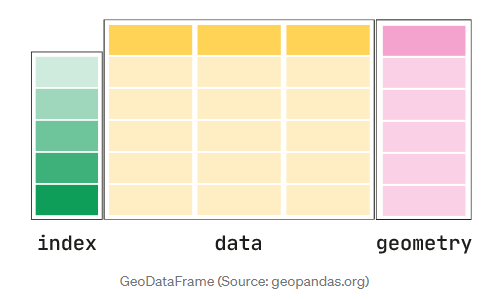

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [2]:
#Gettting the character format

base = open(r'../_data/Datos_panel_distritos.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']

In [3]:
#import csv file from panel covid information at distric level
# Panel data from march-2020 to first two wees of january-2022

cv_data = pd.read_csv( r'../_data/Datos_panel_distritos.csv', encoding = charenc)
cv_data

,Código,Departamento,Provincia,Distrito,Mes,Año,Casos,Muertes Covid,Muertes totales
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,3,2020,0,0,16
1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,4,2020,47,0,5
2,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,5,2020,165,3,11
3,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,6,2020,119,2,15
4,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,7,2020,175,2,8
...,...,...,...,...,...,...,...,...,...
40406,250401,UCAYALI,PURUS,PURUS,9,2021,0,0,0
40407,250401,UCAYALI,PURUS,PURUS,10,2021,0,0,0
40408,250401,UCAYALI,PURUS,PURUS,11,2021,0,0,2
40409,250401,UCAYALI,PURUS,PURUS,12,2021,0,0,0


In [4]:
cv_data.dtypes

Código              int64
Departamento       object
Provincia          object
Distrito           object
Mes                 int64
Año                 int64
Casos               int64
Muertes Covid       int64
Muertes totales     int64
dtype: object

In [5]:
# rename variable to merge later 
cv_data = cv_data.rename({'Código':'UBIGEO'}, axis =1 )
cv_data

,UBIGEO,Departamento,Provincia,Distrito,Mes,Año,Casos,Muertes Covid,Muertes totales
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,3,2020,0,0,16
1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,4,2020,47,0,5
2,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,5,2020,165,3,11
3,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,6,2020,119,2,15
4,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,7,2020,175,2,8
...,...,...,...,...,...,...,...,...,...
40406,250401,UCAYALI,PURUS,PURUS,9,2021,0,0,0
40407,250401,UCAYALI,PURUS,PURUS,10,2021,0,0,0
40408,250401,UCAYALI,PURUS,PURUS,11,2021,0,0,2
40409,250401,UCAYALI,PURUS,PURUS,12,2021,0,0,0


In [6]:
# import csv file of public health centers: MINSA, ESSALUD and Regional Goverment
# coordinates information (NORTE: longitud) (ESTE: latitud)

health_centers = pd.read_csv(r'../_data/centros_hospitalarios.csv')
health_centers

,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,Dirección,...,Estado,Situación,Condición,Inspección,NORTE,ESTE,COTA,CAMAS,code1,code2
0,GOBIERNO REGIONAL,2076,SAN PABLO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LA BREA,200703,LAMBAYEQUE S/N NEGRITOS,...,ACTIVADO,,EN FUNCIONAMIENTO,,-81.310632,-4.665043,15.3,NaN,19,1
1,ESSALUD,20628,POSTA MEDICA NEGRITOS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LA BREA,200703,AVENIDA SAN MARTIN Nº 100 NEGRITOS,...,ACTIVADO,,EN FUNCIONAMIENTO,,-81.306508,-4.654384,20.4,NaN,19,1
2,GOBIERNO REGIONAL,2075,NEGRITOS,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LA BREA,200703,URB. SUD AMERICA D-14 TALARA,...,ACTIVADO,,EN FUNCIONAMIENTO,,-81.303974,-4.658634,41.6,NaN,4,1
3,GOBIERNO REGIONAL,2077,LOBITOS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LOBITOS,200704,BARRIO PRIMAVERA A- 100 LOBITOS,...,ACTIVADO,,EN FUNCIONAMIENTO,,-81.275139,-4.456625,39.4,NaN,19,1
4,ESSALUD,12243,HOSPITAL II ESSALUD TALARA,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,PIURA,TALARA,PARIÑAS,200701,AV. PANAMERICANA S/N CARRETERA A LOBITOS,...,ACTIVADO,,EN FUNCIONAMIENTO,,-81.273840,-4.568419,28.7,35.0,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8459,GOBIERNO REGIONAL,6039,LA QUEBRADA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,CAÑETE,SAN LUIS,150514,CALLE CALLE LAS PALMAS S/N NÚMERO S/N DISTRITO...,...,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN,19,1
8460,GOBIERNO REGIONAL,6039,LA QUEBRADA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,CAÑETE,SAN LUIS,150514,CALLE CALLE LAS PALMAS S/N NÚMERO S/N DISTRITO...,...,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN,19,1
8461,GOBIERNO REGIONAL,6038,SANTA BARBARA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,CAÑETE,SAN LUIS,150514,OTROS C.P.M. SANTA BARBARA DISTRITO SAN LUIS P...,...,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN,19,1
8462,GOBIERNO REGIONAL,5637,MANAS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,CAJATAMBO,MANAS,150305,CALLE CALLE GRAU S/N NÚMERO S/N DISTRITO MANAS...,...,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN,19,1


In [7]:
# DataFrame to GeoDataFrame

Public_health = gpd.GeoDataFrame(
    health_centers, geometry=gpd.points_from_xy(health_centers.NORTE, health_centers.ESTE))

## Types and classification public centers

#### We focus on Postas médicas and Hospitales

#### code2 (Type)

ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO:			1

SERVICIO MÉDICO DE APOYO:			                2

ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO:			3


#### code1 (Clasification)

ATENCION PRE HOSPITALARIA:	1

CENTROS DE ATENCION PARA DEPENDIENTES A SUSTANCIAS PSICOACTIVAS Y OTRAS DEPENDENCIAS:	2

CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO:	3

CENTROS DE SALUD O CENTROS MEDICOS:	4

CENTROS DE SALUD O CENTROS MEDICOS,CENTROS DE SALUD O CENTROS MEDICOS:	5

CENTROS DE VACUNACION:	6

CENTROS MEDICOS ESPECIALIZADOS:	7

CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES DE LA SALUD:	8

ESTABLECIMIENTOS DE RECUPERACION O REPOSO:	9

HEMODIALISIS:	10

HOSPITALES O CLINICAS DE ATENCION ESPECIALIZADA:	11

HOSPITALES O CLINICAS DE ATENCION GENERAL:	12

INSTITUTOS DE SALUD ESPECIALIZADOS:	13

MEDICINA FISICA,REHABILITACION:	14

PATOLOGIA CLINICA:	15

PATOLOGIA CLINICA,ANATOMIA PATOLOGICA:	16

PATOLOGIA CLINICA,DIAGNOSTICO POR IMAGENES:	17

POLICLINICOS:	18

PUESTOS DE SALUD O POSTAS DE SALUD:	19

PUESTOS DE SALUD O POSTAS DE SALUD,PUESTOS DE SALUD O POSTAS DE SALUD:	19

SERVICIO DE TRASLADO DE PACIENTES:	20

SERVICIO DE TRASLADO DE PACIENTES,ATENCION DOMICILIARIA:	21

SERVICIO DE TRASLADO DE PACIENTES,ATENCION DOMICILIARIA,ATENCION PRE HOSPITALARIA:	22

SERVICIO DE TRASLADO DE PACIENTES,ATENCION PRE HOSPITALARIA:	23

CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO:	24


In [8]:
Public_health

,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,Dirección,...,Situación,Condición,Inspección,NORTE,ESTE,COTA,CAMAS,code1,code2,geometry
0,GOBIERNO REGIONAL,2076,SAN PABLO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LA BREA,200703,LAMBAYEQUE S/N NEGRITOS,...,,EN FUNCIONAMIENTO,,-81.310632,-4.665043,15.3,NaN,19,1,POINT (-81.31063 -4.66504)
1,ESSALUD,20628,POSTA MEDICA NEGRITOS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LA BREA,200703,AVENIDA SAN MARTIN Nº 100 NEGRITOS,...,,EN FUNCIONAMIENTO,,-81.306508,-4.654384,20.4,NaN,19,1,POINT (-81.30651 -4.65438)
2,GOBIERNO REGIONAL,2075,NEGRITOS,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LA BREA,200703,URB. SUD AMERICA D-14 TALARA,...,,EN FUNCIONAMIENTO,,-81.303974,-4.658634,41.6,NaN,4,1,POINT (-81.30397 -4.65863)
3,GOBIERNO REGIONAL,2077,LOBITOS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LOBITOS,200704,BARRIO PRIMAVERA A- 100 LOBITOS,...,,EN FUNCIONAMIENTO,,-81.275139,-4.456625,39.4,NaN,19,1,POINT (-81.27514 -4.45663)
4,ESSALUD,12243,HOSPITAL II ESSALUD TALARA,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,PIURA,TALARA,PARIÑAS,200701,AV. PANAMERICANA S/N CARRETERA A LOBITOS,...,,EN FUNCIONAMIENTO,,-81.273840,-4.568419,28.7,35.0,12,3,POINT (-81.27384 -4.56842)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8459,GOBIERNO REGIONAL,6039,LA QUEBRADA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,CAÑETE,SAN LUIS,150514,CALLE CALLE LAS PALMAS S/N NÚMERO S/N DISTRITO...,...,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN,19,1,POINT EMPTY
8460,GOBIERNO REGIONAL,6039,LA QUEBRADA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,CAÑETE,SAN LUIS,150514,CALLE CALLE LAS PALMAS S/N NÚMERO S/N DISTRITO...,...,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN,19,1,POINT EMPTY
8461,GOBIERNO REGIONAL,6038,SANTA BARBARA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,CAÑETE,SAN LUIS,150514,OTROS C.P.M. SANTA BARBARA DISTRITO SAN LUIS P...,...,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN,19,1,POINT EMPTY
8462,GOBIERNO REGIONAL,5637,MANAS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,CAJATAMBO,MANAS,150305,CALLE CALLE GRAU S/N NÚMERO S/N DISTRITO MANAS...,...,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN,19,1,POINT EMPTY


In [9]:
# code1 = 9 to postas médicas and code1 = 12 & 24 to Hospitals 

Public_health1 = Public_health[Public_health.code1 == "19"]
Public_health2 = Public_health[(Public_health.code1 == "12") | (Public_health.code1 == "24")]
Public_health2

,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,Dirección,...,Situación,Condición,Inspección,NORTE,ESTE,COTA,CAMAS,code1,code2,geometry
4,ESSALUD,12243,HOSPITAL II ESSALUD TALARA,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,PIURA,TALARA,PARIÑAS,200701,AV. PANAMERICANA S/N CARRETERA A LOBITOS,...,,EN FUNCIONAMIENTO,,-81.273840,-4.568419,28.7,35.0,12,3,POINT (-81.27384 -4.56842)
5,GOBIERNO REGIONAL,2074,TALARA II,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,PIURA,TALARA,PARIÑAS,200701,AVENIDA GRAU S/N EXPOLICLINICO PETROPERU,...,,EN FUNCIONAMIENTO,,-81.272096,-4.578829,21.1,NaN,24,3,POINT (-81.27210 -4.57883)
19,ESSALUD,11763,HOSPITAL I MIGUEL CRUZADO VERA - PAITA,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,PIURA,PAITA,PAITA,200501,CARRETERA PAITA - PIURA KM 1.5,...,,EN FUNCIONAMIENTO,,-81.100243,-5.087583,75.9,12.0,24,3,POINT (-81.10024 -5.08758)
20,GOBIERNO REGIONAL,2021,HOSPITAL LAS MERCEDES-PAITA,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,PIURA,PAITA,PAITA,200501,LOS PESCADORES S/N LA PUNTA,...,,EN FUNCIONAMIENTO,,-81.091531,-5.090815,78.3,79.0,12,3,POINT (-81.09153 -5.09081)
23,GOBIERNO REGIONAL,2026,PUEBLO NUEVO DE COLAN,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,PIURA,PAITA,COLAN,200504,JR. ALFONSO UGARTE S/N,...,,EN FUNCIONAMIENTO,,-81.058005,-4.911551,16.6,NaN,24,3,POINT (-81.05801 -4.91155)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,ESSALUD,11702,"VIRU ""VICTOR SOLES GARCIA""",HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LA LIBERTAD,VIRU,VIRU,131201,AVENIDA VICTOR RAUL S/N SECTOR SAN LUIS,...,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,6.0,12,3,POINT EMPTY
8302,GOBIERNO REGIONAL,887,LLATA,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,HUANUCO,HUAMALIES,LLATA,100501,JIRÓN JR.28 DE JULIO Nº 260 DISTRITO LLATA PRO...,...,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,12.0,24,3,POINT EMPTY
8322,ESSALUD,9954,HOSPITAL I CHEPEN ESSALUD,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LA LIBERTAD,CHEPEN,CHEPEN,130401,AVENIDA AV. LAS PALMERAS S/N - URB HUANCHACO N...,...,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,14.0,12,3,POINT EMPTY
8375,GOBIERNO REGIONAL,1455,CENTRO DE SALUD COTAHUASI,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,AREQUIPA,LA UNION,COTAHUASI,40801,AVENIDA AVENIDA LA UNION S/N NÚMERO S/N DISTRI...,...,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN,24,3,POINT EMPTY


In [10]:
# Upload shape file at district level

maps = gpd.read_file(r'../_data/shape_file/DISTRITOS.shp')
maps

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...,...,...,...,...,...,...,...,...,...
1868,10,HUANUCO,1006,LEONCIO PRADO,100608,CASTILLO GRANDE,CASTILLO GRANDE,0001,1,INEI,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,10,HUANUCO,1006,LEONCIO PRADO,100609,PUEBLO NUEVO,PUEBLO NUEVO,0001,1,INEI,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,10,HUANUCO,1006,LEONCIO PRADO,100610,SANTO DOMINGO DE ANDA,PACAE,0001,1,INEI,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,21,PUNO,2111,SAN ROMAN,211105,SAN MIGUEL,SAN MIGUEL,0001,1,INEI,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [11]:
type(maps.geometry)

geopandas.geoseries.GeoSeries

In [12]:
#Check unique values

maps['IDDIST'].is_unique
maps['IDDIST'].unique().size

1873

In [13]:
maps = maps[['IDDIST', 'geometry']]
maps = maps.rename({'IDDIST':'UBIGEO'}, axis =1 )
maps 

,UBIGEO,geometry
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [14]:
maps.dtypes

UBIGEO        object
geometry    geometry
dtype: object

In [15]:
# Object or srting to int

maps['UBIGEO'] = maps['UBIGEO'].astype(str).astype(int)
maps

,UBIGEO,geometry
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [16]:
# Merge using inner way to drop missing values 

dataset_cv = pd.merge(maps, cv_data, how="inner", on="UBIGEO")
dataset_cv

,UBIGEO,geometry,Departamento,Provincia,Distrito,Mes,Año,Casos,Muertes Covid,Muertes totales
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",HUANUCO,PUERTO INCA,CODO DEL POZUZO,3,2020,0,0,3
1,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",HUANUCO,PUERTO INCA,CODO DEL POZUZO,4,2020,0,1,2
2,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",HUANUCO,PUERTO INCA,CODO DEL POZUZO,5,2020,1,0,2
3,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",HUANUCO,PUERTO INCA,CODO DEL POZUZO,6,2020,7,0,1
4,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",HUANUCO,PUERTO INCA,CODO DEL POZUZO,7,2020,11,1,4
...,...,...,...,...,...,...,...,...,...,...
40360,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",LIMA,HUAURA,HUAURA,9,2021,9,0,20
40361,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",LIMA,HUAURA,HUAURA,10,2021,11,2,16
40362,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",LIMA,HUAURA,HUAURA,11,2021,28,1,10
40363,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",LIMA,HUAURA,HUAURA,12,2021,75,1,16


In [17]:
dataset_cv['Año'].isnull().sum()

0

In [18]:
#Function to filter dataset_covid by year, month and administrative space

def subdata( a , b, c ):
    
    if c == "All-Peru":
        
        resultado = dataset_cv.loc[(dataset_cv['Año']== a) & (dataset_cv['Mes']== b)]
    else:
        resultado = dataset_cv.loc[(dataset_cv['Año']== a) & (dataset_cv['Mes']== b) & (dataset_cv['Provincia']== c)]
    return resultado  



In [19]:

base = subdata( 2020 ,12, "All-Peru")  # all peru Dec-2020
base_lima = subdata( 2020 ,4, "LIMA")  # Lima April - 2020

In [20]:
base_lima

,UBIGEO,geometry,Departamento,Provincia,Distrito,Mes,Año,Casos,Muertes Covid,Muertes totales
8143,150119,"POLYGON ((-76.70549 -12.17672, -76.70429 -12.1...",LIMA,LIMA,LURIN,4,2020,178,13,35
9086,150102,"POLYGON ((-77.06517 -11.57512, -77.06505 -11.5...",LIMA,LIMA,ANCON,4,2020,109,14,24
11685,150131,"POLYGON ((-77.04859 -12.08504, -77.04762 -12.0...",LIMA,LIMA,SAN ISIDRO,4,2020,229,9,53
11708,150120,"POLYGON ((-77.07210 -12.08358, -77.06348 -12.0...",LIMA,LIMA,MAGDALENA DEL MAR,4,2020,172,6,52
11731,150130,"POLYGON ((-76.98732 -12.07994, -76.98425 -12.0...",LIMA,LIMA,SAN BORJA,4,2020,352,23,76
11754,150116,"POLYGON ((-77.02807 -12.07871, -77.02435 -12.0...",LIMA,LIMA,LINCE,4,2020,226,10,82
11777,150140,"POLYGON ((-76.95923 -12.07576, -76.95831 -12.0...",LIMA,LIMA,SANTIAGO DE SURCO,4,2020,733,54,209
11846,150121,"POLYGON ((-77.04966 -12.07025, -77.05097 -12.0...",LIMA,LIMA,PUEBLO LIBRE,4,2020,201,17,75
12375,150139,"POLYGON ((-77.14355 -11.79587, -77.14061 -11.7...",LIMA,LIMA,SANTA ROSA,4,2020,16,2,7
15043,150106,"POLYGON ((-76.89995 -11.72979, -76.89921 -11.7...",LIMA,LIMA,CARABAYLLO,4,2020,485,39,121


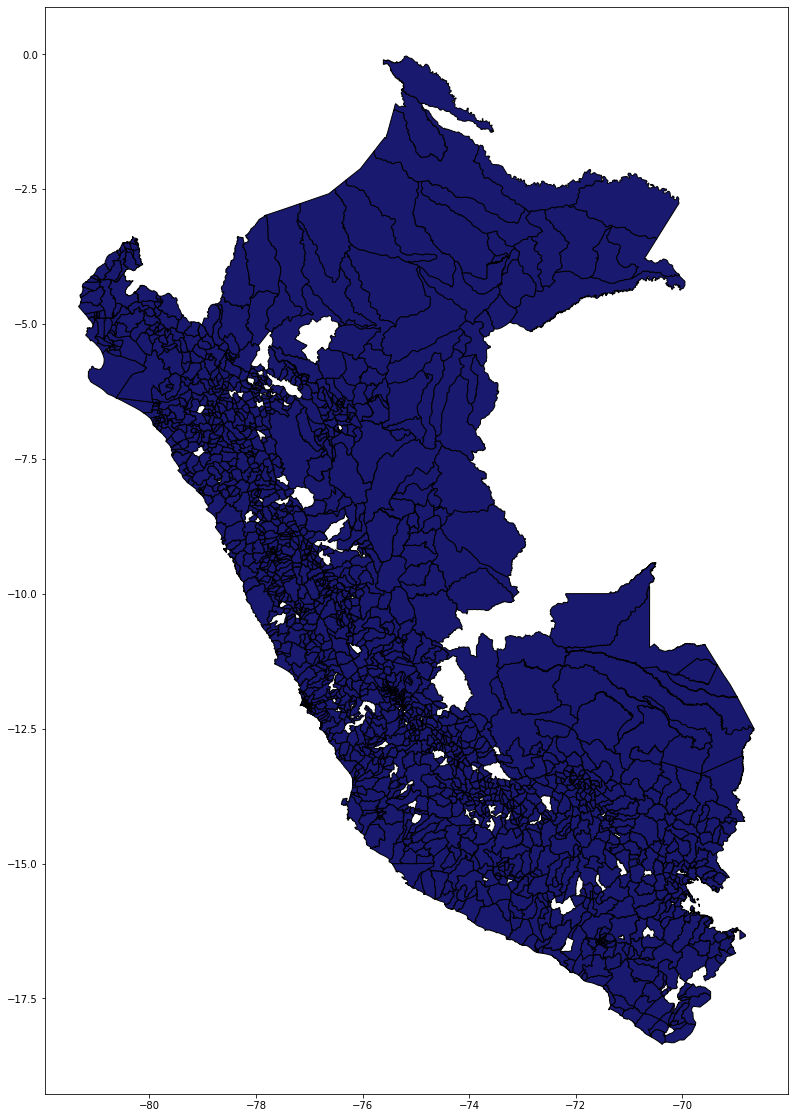

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))
base.plot(ax=ax,color='midnightblue', linestyle='-',
                      edgecolor='black')
plt.show()

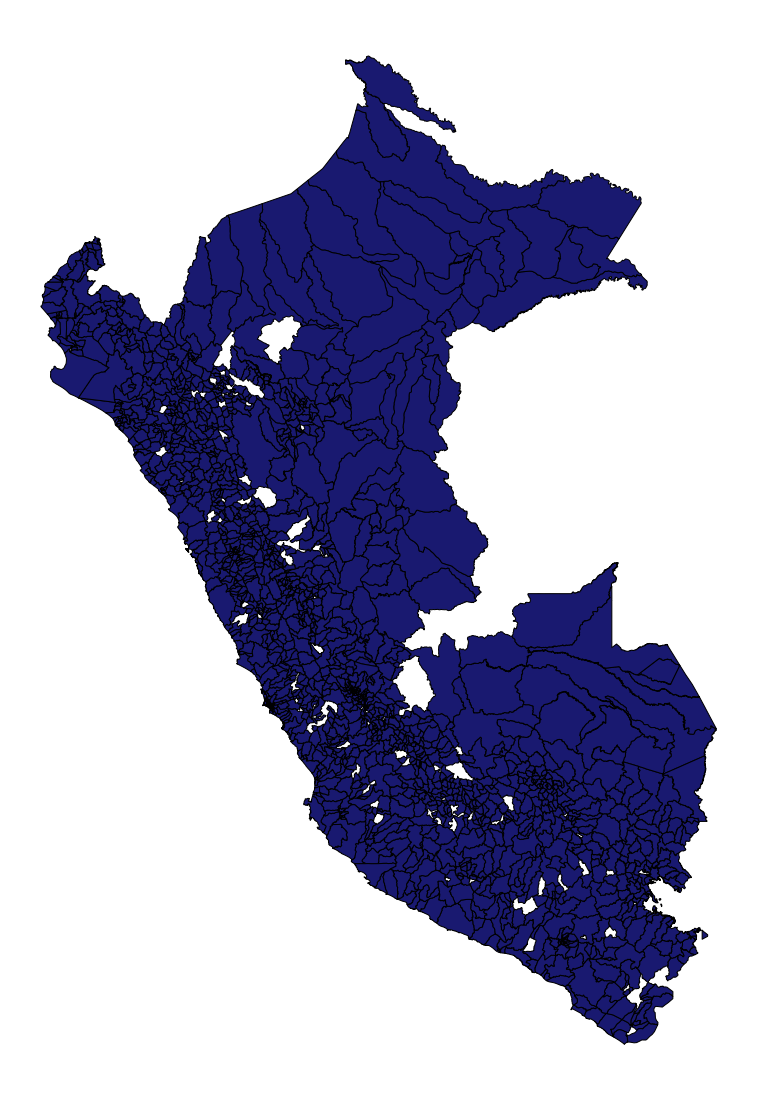

In [22]:
#Plot without axis

fig, ax = plt.subplots(figsize=(20, 20))
base.plot(ax=ax,color='midnightblue', linestyle='-',
                      edgecolor='black')
ax.set_axis_off()

<AxesSubplot:>

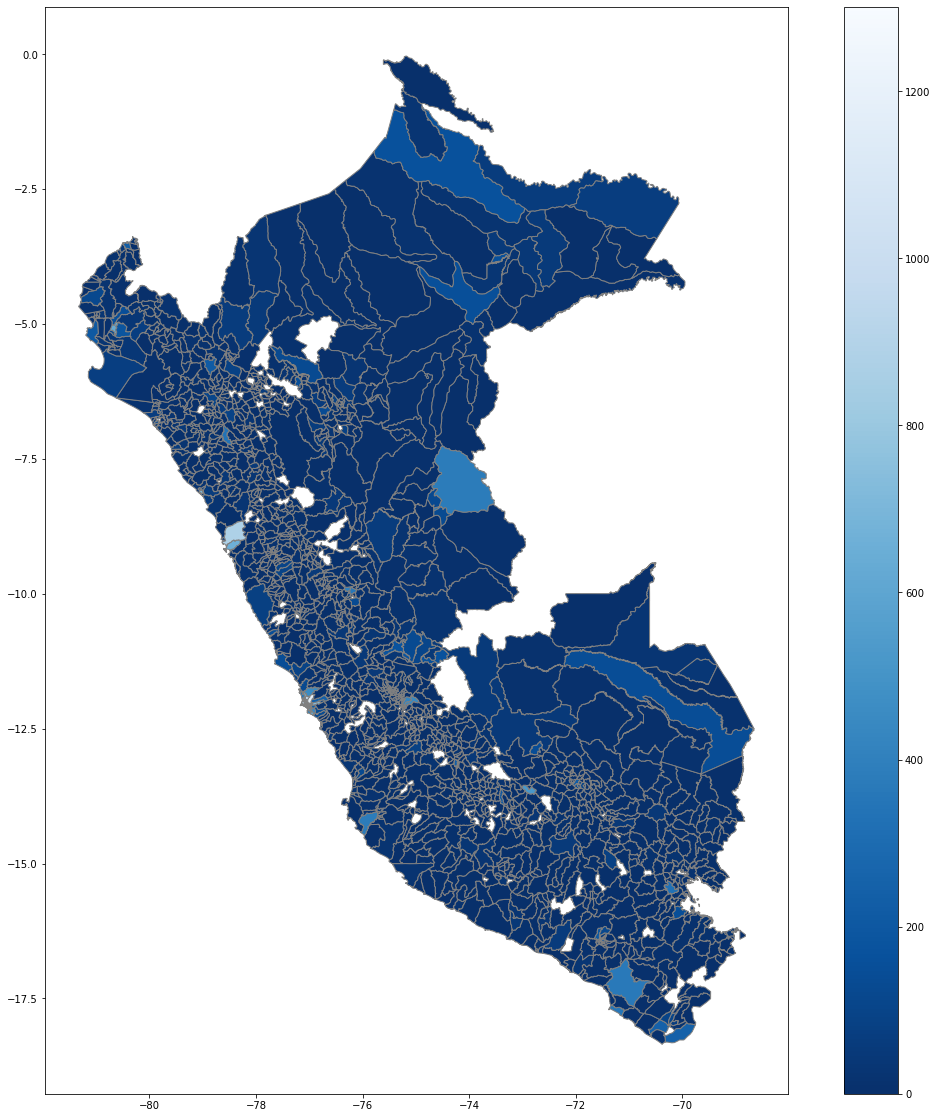

In [23]:
# Plot covid infection at disctrict level 

base.plot(column='Casos', cmap='Blues_r', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True)

<AxesSubplot:>

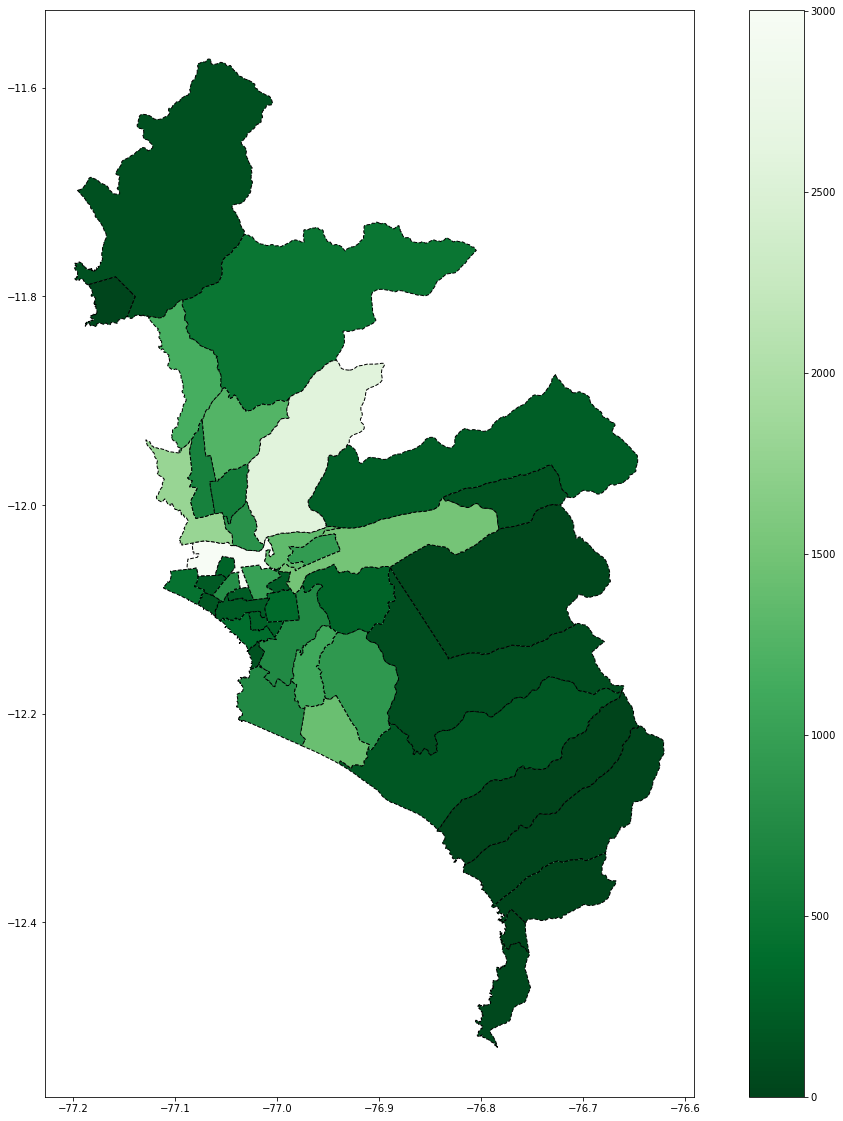

In [24]:
#Covid & Lima Matropolitana 

base_lima.plot(column='Casos', cmap='Greens_r', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

<AxesSubplot:>

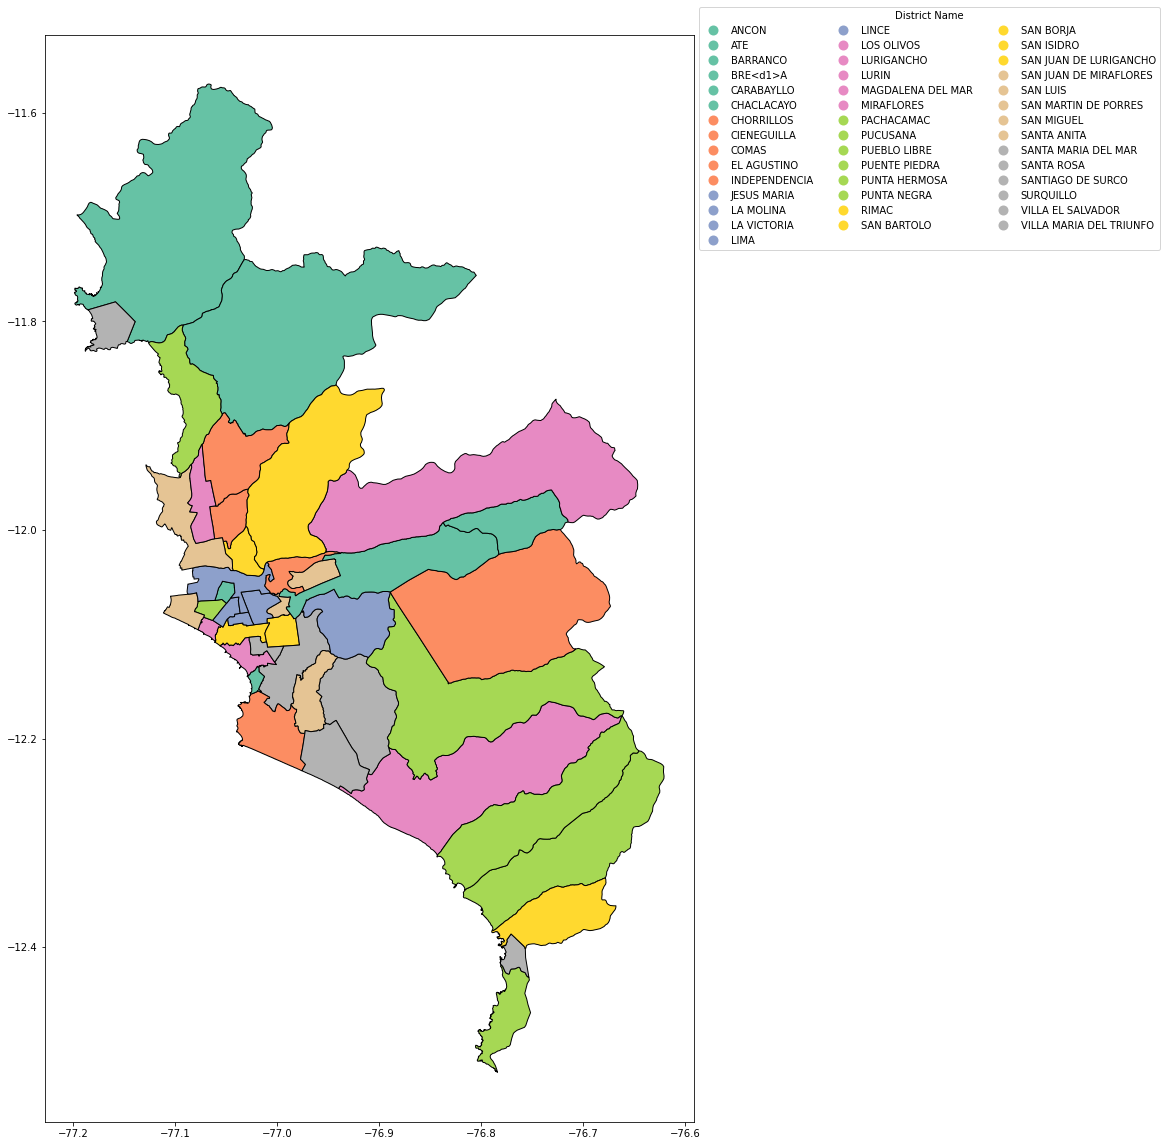

In [25]:
#Using legend by district 
leg_kwds={'title':'District Name',
          'loc': 'upper left',
          'bbox_to_anchor':(1, 1.03),
          'ncol':3}

base_lima.plot(column='Distrito', cmap='Set2', figsize=(20, 20), legend = True, linestyle='-', 
               edgecolor='black',
               legend_kwds = leg_kwds)


<AxesSubplot:>

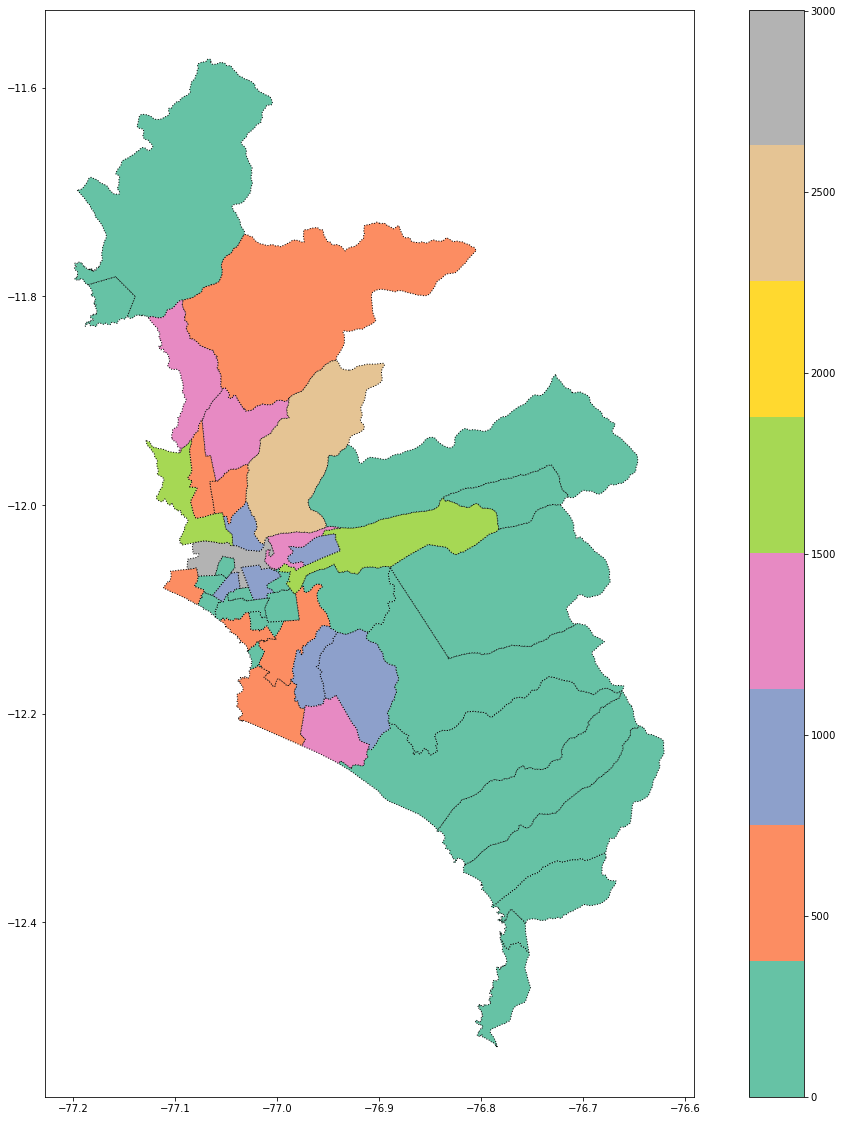

In [26]:
#Quantiles quantity of infection 

base_lima.plot(column='Casos', cmap='Set2', figsize=(20, 20), linestyle=':', 
               edgecolor='black',
               legend = True)

In [27]:
# Postas Médicas and Hospitales públicos

PH_lima_postas = Public_health1[Public_health1.Provincia == "LIMA"]

PH_lima_hospitales = Public_health2[Public_health2.Provincia == "LIMA"]
PH_lima_hospitales

,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,Dirección,...,Situación,Condición,Inspección,NORTE,ESTE,COTA,CAMAS,code1,code2,geometry
2715,MINSA,5814,CENTRO DE SALUD MATERNO INFANTIL ANCON,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,ANCON,150102,JR. LOA 595 ANCON,...,,EN FUNCIONAMIENTO,,-77.172725,-11.774719,12.0,NaN,24,3,POINT (-77.17272 -11.77472)
2803,MINSA,5816,MATERNO INFANTIL DR. ENRIQUE MARTIN ALTUNA,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,PUENTE PIEDRA,150125,ASOC VIV E INDUSTRIAS VIRGEN DE LAS NIEVES URB...,...,,EN FUNCIONAMIENTO,,-77.109100,-11.837611,200.0,NaN,24,3,POINT (-77.10910 -11.83761)
2832,ESSALUD,8564,HOSPITAL I OCTAVIO MONGRUT MUÑOZ,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,SAN MIGUEL,150136,AV PARQUE DE LAS LEYENDAS 255,...,,EN FUNCIONAMIENTO,,-77.094583,-12.065961,NaN,49.0,12,3,POINT (-77.09458 -12.06596)
2852,MINSA,5817,SANTA ROSA,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,PUENTE PIEDRA,150125,"AA.HH. SANTA ROSA, MZ. 50, LOTE PM - AV. SANTA...",...,,EN FUNCIONAMIENTO,,-77.081693,-11.874827,200.0,NaN,24,3,POINT (-77.08169 -11.87483)
2859,MINSA,7632,HOSPITAL CARLOS LANFRANCO LA HOZ,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,PUENTE PIEDRA,150125,AV. SAENZ PEÑA - CUADRA 6 S/N,...,,EN FUNCIONAMIENTO,,-77.079335,-11.863181,NaN,102.0,12,3,POINT (-77.07934 -11.86318)
2862,MINSA,5799,CLAS JUAN PABLO II,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,LOS OLIVOS,150117,CALLE 28 S/N AA.HH. JUAN PABLO II,...,,EN FUNCIONAMIENTO,,-77.078891,-11.953212,63.0,NaN,24,3,POINT (-77.07889 -11.95321)
2875,MINSA,5821,LOS SUREÑOS,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,PUENTE PIEDRA,150125,COOP. VIVIENDA LOS SUREÑOS MZ M LT. 35,...,,EN FUNCIONAMIENTO,,-77.069701,-11.887532,200.0,NaN,24,3,POINT (-77.06970 -11.88753)
2879,MINSA,6196,MAGDALENA,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,MAGDALENA DEL MAR,150120,JR. JUNÍN 322,...,,EN FUNCIONAMIENTO,,-77.068627,-12.088694,27.0,NaN,24,3,POINT (-77.06863 -12.08869)
2887,MINSA,6214,HOSPITAL VICTOR LARCO HERRERA,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,MAGDALENA DEL MAR,150120,AV.AUGUSTO PEREZ ARANIBAR N° 600,...,,EN FUNCIONAMIENTO,,-77.065756,-12.098705,NaN,590.0,12,3,POINT (-77.06576 -12.09871)
2904,MINSA,5772,CENTRO MATERNO INFANTIL SANTA LUZMILA II,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,COMAS,150110,AVENIDA AV. 22 DE AGOSTO N° 1001- URB SANTA LU...,...,,EN FUNCIONAMIENTO,,-77.058712,-11.947025,101.0,NaN,24,3,POINT (-77.05871 -11.94703)


<AxesSubplot:>

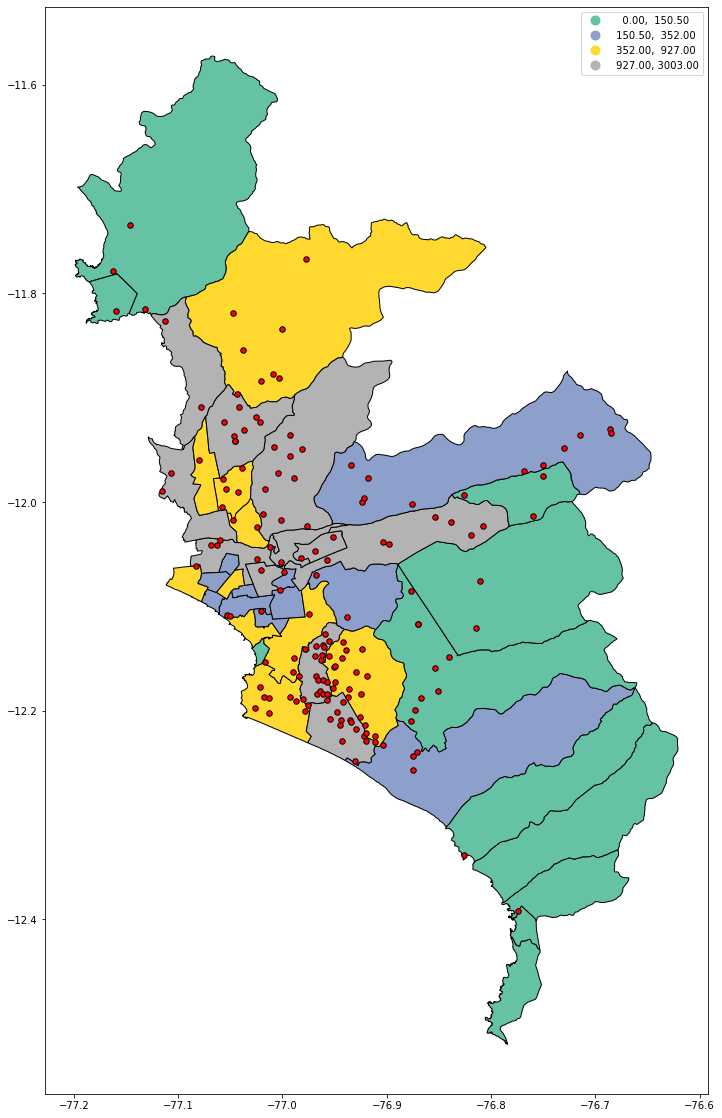

In [28]:
# Covid infection and Postas médicas 

gf = base_lima.plot(column='Casos', cmap='Set2', figsize=(20, 20),
                      scheme='quantiles',
                      k=4,
                      linestyle='-',
                      edgecolor='black',
                      legend = True)
PH_lima_postas.plot(ax = gf, color = 'red', markersize=30, edgecolor='black')

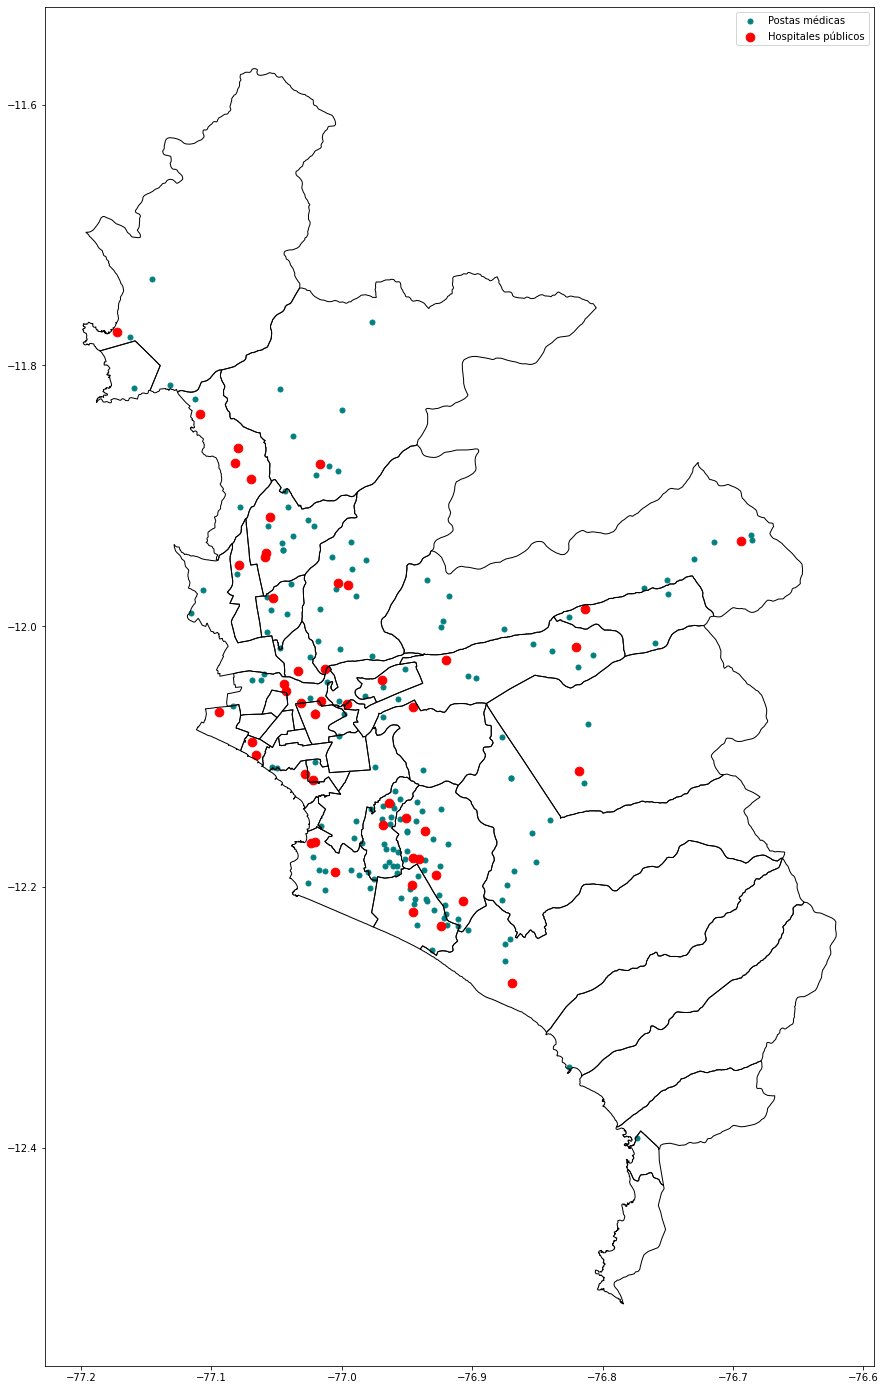

In [29]:
ax = base_lima.plot(figsize=(25, 25), color='none', edgecolor='black', zorder=3)
PH_lima_postas.plot(color='teal', label = "Postas médicas", markersize=25, ax=ax)
PH_lima_hospitales.plot(color='red', label = "Hospitales públicos", markersize=75, ax=ax)
plt.legend(loc='upper right')

<AxesSubplot:>

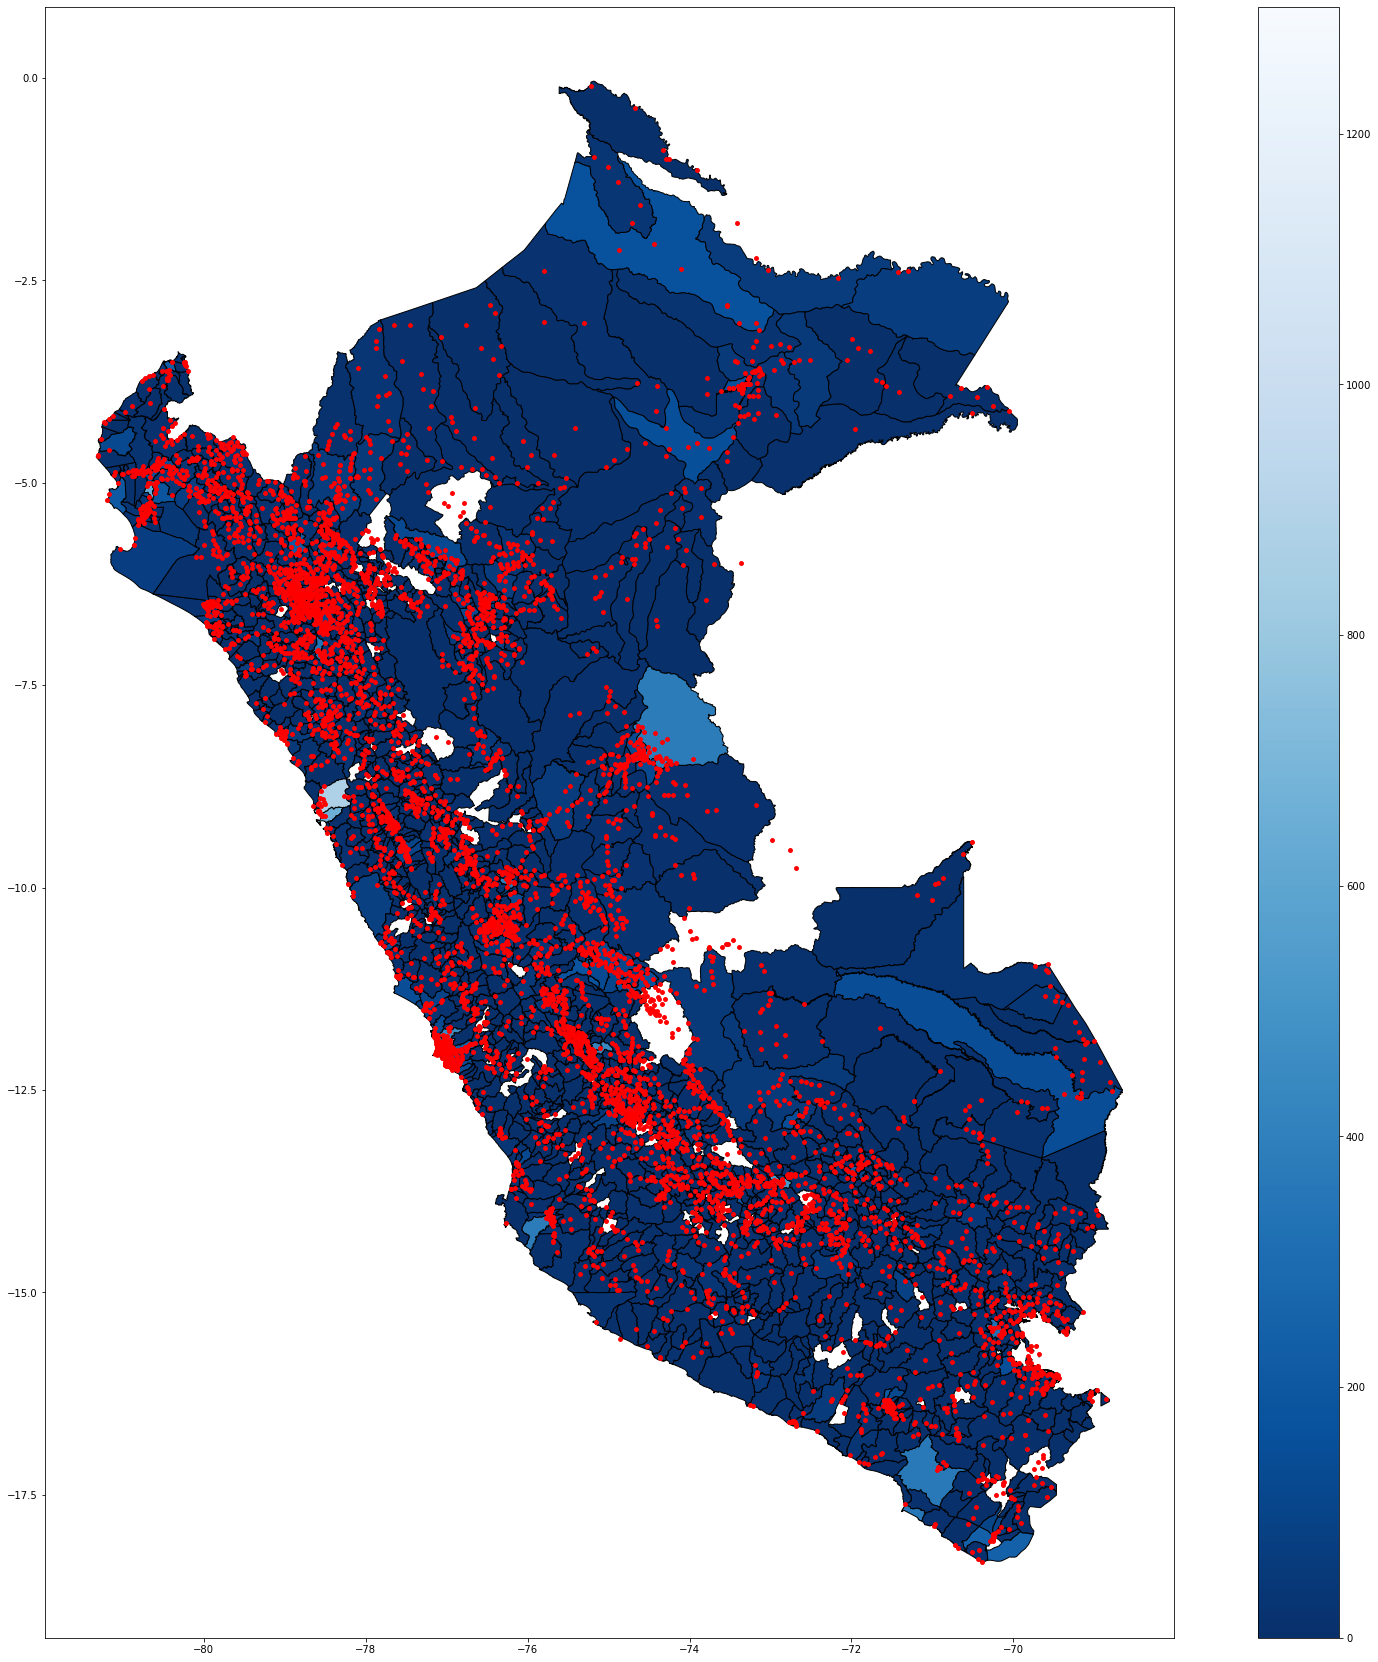

In [30]:
# Covid infection & postas médicas at the national level 

gf = base.plot(column='Casos', cmap='Blues_r', 
          figsize=(30, 30),
          linestyle='-',
          edgecolor='black',
          legend = True)
Public_health1.plot(ax = gf, color = 'red', markersize=15)

<AxesSubplot:>

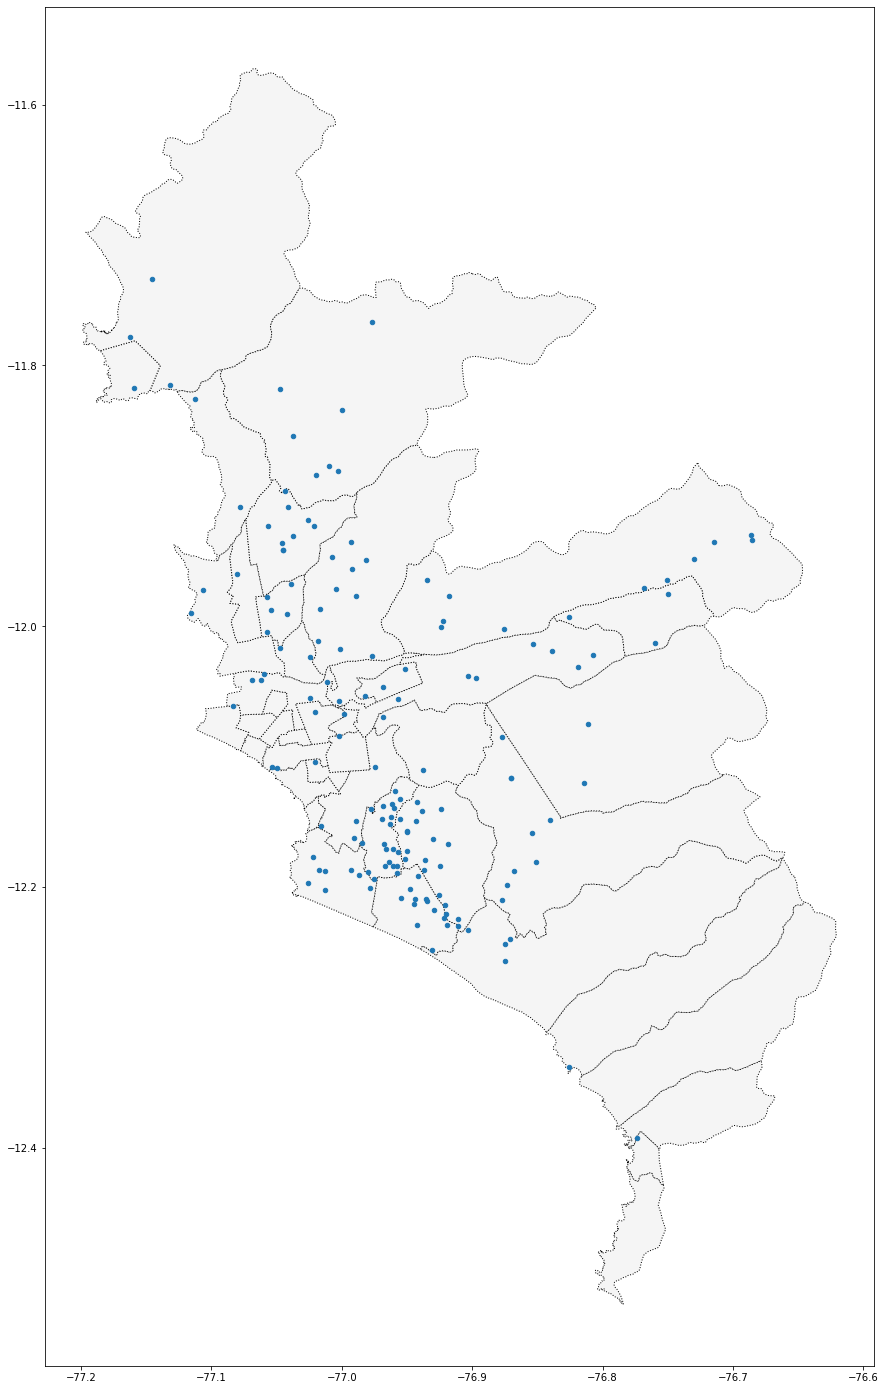

In [32]:
ax = base_lima.plot(figsize=(25,25), color='whitesmoke', linestyle=':', edgecolor='black')
PH_lima_postas.plot(markersize=20, ax=ax)

In [33]:
base_lima = base_lima.set_index("Distrito")

In [34]:
# Get buffered region and centroid points
base_lima["buffered"] = base_lima.buffer(10000)
base_lima['centroid'] = base_lima.centroid

C:\Users\Roberto Carlos\AppData\Local\Temp\ipykernel_18884\2755669895.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  base_lima["buffered"] = base_lima.buffer(10000)
C:\Users\Roberto Carlos\AppData\Local\Temp\ipykernel_18884\2755669895.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  base_lima['centroid'] = base_lima.centroid


In [35]:
base_lima

,UBIGEO,geometry,Departamento,Provincia,Mes,Año,Casos,Muertes Covid,Muertes totales,buffered,centroid
Distrito,,,,,,,,,,,
LURIN,150119,"POLYGON ((-76.70549 -12.17672, -76.70429 -12.1...",LIMA,LIMA,4,2020,178,13,35,"POLYGON ((-907.44458 9940.34876, -908.51450 99...",POINT (-76.80111 -12.23426)
ANCON,150102,"POLYGON ((-77.06517 -11.57512, -77.06505 -11.5...",LIMA,LIMA,4,2020,109,14,24,"POLYGON ((-10070.83398 214.65757, -10071.54511...",POINT (-77.09581 -11.70253)
SAN ISIDRO,150131,"POLYGON ((-77.04859 -12.08504, -77.04762 -12.0...",LIMA,LIMA,4,2020,229,9,53,"POLYGON ((-6569.98336 7593.29451, -5804.27878 ...",POINT (-77.03667 -12.09898)
MAGDALENA DEL MAR,150120,"POLYGON ((-77.07210 -12.08358, -77.06348 -12.0...",LIMA,LIMA,4,2020,172,6,52,"POLYGON ((-6950.49655 7251.25149, -6191.31465 ...",POINT (-77.06669 -12.09384)
SAN BORJA,150130,"POLYGON ((-76.98732 -12.07994, -76.98425 -12.0...",LIMA,LIMA,4,2020,352,23,76,"POLYGON ((-1770.66790 9843.44877, -791.27992 9...",POINT (-76.99521 -12.09755)
LINCE,150116,"POLYGON ((-77.02807 -12.07871, -77.02435 -12.0...",LIMA,LIMA,4,2020,226,10,82,"POLYGON ((-1448.68595 9893.40233, -503.73208 9...",POINT (-77.03567 -12.08579)
SANTIAGO DE SURCO,150140,"POLYGON ((-76.95923 -12.07576, -76.95831 -12.0...",LIMA,LIMA,4,2020,733,54,209,"POLYGON ((-3326.57958 9440.77630, -3327.93789 ...",POINT (-76.98431 -12.12699)
PUEBLO LIBRE,150121,"POLYGON ((-77.04966 -12.07025, -77.05097 -12.0...",LIMA,LIMA,4,2020,201,17,75,"POLYGON ((6246.29993 7734.88076, 6978.22097 70...",POINT (-77.06574 -12.07508)
SANTA ROSA,150139,"POLYGON ((-77.14355 -11.79587, -77.14061 -11.7...",LIMA,LIMA,4,2020,16,2,7,"POLYGON ((6739.98962 7295.68218, 6744.33819 73...",POINT (-77.16325 -11.80501)


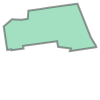

In [36]:
#Plot selectec districs 

ATE = base_lima.loc["LINCE", "geometry"]
ATE

<AxesSubplot:>

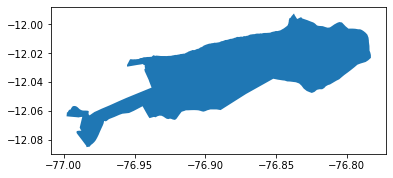

In [37]:

Comas = base_lima[base_lima.UBIGEO == 150103]
Comas.plot()

In [38]:
base_lima.GeoSeries(["ATE", "LINCE", "SAN ISIDRO", "SAN JUAN DE LURIGANCHO"]).plot()

AttributeError: 'GeoDataFrame' object has no attribute 'GeoSeries'

In [39]:
ate = base_lima.loc["ATE", 'geometry']
lince = base_lima.loc["LINCE", 'geometry']

In [40]:
# Add lince that cross Lince and ATE

ate_lince_lince = LineString(zip((ate.x, lince.x ), (ate.y, lince.y)))

fig, ax = plt.subplots(figsize=(20,20))
base_lima.plot(color='gainsboro', ax=ax)
base_lima.GeoSeries([ate_lince_lince]).plot(color='deeppink', ax = ax)

AttributeError: 'Polygon' object has no attribute 'x'

In [41]:
base_lima['area']=base_lima.area
base_lima

C:\Users\Roberto Carlos\AppData\Local\Temp\ipykernel_18884\3468981840.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  base_lima['area']=base_lima.area


,UBIGEO,geometry,Departamento,Provincia,Mes,Año,Casos,Muertes Covid,Muertes totales,buffered,centroid,area
Distrito,,,,,,,,,,,,
LURIN,150119,"POLYGON ((-76.70549 -12.17672, -76.70429 -12.1...",LIMA,LIMA,4,2020,178,13,35,"POLYGON ((-907.44458 9940.34876, -908.51450 99...",POINT (-76.80111 -12.23426),0.015586
ANCON,150102,"POLYGON ((-77.06517 -11.57512, -77.06505 -11.5...",LIMA,LIMA,4,2020,109,14,24,"POLYGON ((-10070.83398 214.65757, -10071.54511...",POINT (-77.09581 -11.70253),0.025751
SAN ISIDRO,150131,"POLYGON ((-77.04859 -12.08504, -77.04762 -12.0...",LIMA,LIMA,4,2020,229,9,53,"POLYGON ((-6569.98336 7593.29451, -5804.27878 ...",POINT (-77.03667 -12.09898),0.000805
MAGDALENA DEL MAR,150120,"POLYGON ((-77.07210 -12.08358, -77.06348 -12.0...",LIMA,LIMA,4,2020,172,6,52,"POLYGON ((-6950.49655 7251.25149, -6191.31465 ...",POINT (-77.06669 -12.09384),0.000271
SAN BORJA,150130,"POLYGON ((-76.98732 -12.07994, -76.98425 -12.0...",LIMA,LIMA,4,2020,352,23,76,"POLYGON ((-1770.66790 9843.44877, -791.27992 9...",POINT (-76.99521 -12.09755),0.000860
LINCE,150116,"POLYGON ((-77.02807 -12.07871, -77.02435 -12.0...",LIMA,LIMA,4,2020,226,10,82,"POLYGON ((-1448.68595 9893.40233, -503.73208 9...",POINT (-77.03567 -12.08579),0.000228
SANTIAGO DE SURCO,150140,"POLYGON ((-76.95923 -12.07576, -76.95831 -12.0...",LIMA,LIMA,4,2020,733,54,209,"POLYGON ((-3326.57958 9440.77630, -3327.93789 ...",POINT (-76.98431 -12.12699),0.002882
PUEBLO LIBRE,150121,"POLYGON ((-77.04966 -12.07025, -77.05097 -12.0...",LIMA,LIMA,4,2020,201,17,75,"POLYGON ((6246.29993 7734.88076, 6978.22097 70...",POINT (-77.06574 -12.07508),0.000386
SANTA ROSA,150139,"POLYGON ((-77.14355 -11.79587, -77.14061 -11.7...",LIMA,LIMA,4,2020,16,2,7,"POLYGON ((6739.98962 7295.68218, 6744.33819 73...",POINT (-77.16325 -11.80501),0.001446


In [42]:
#Distamce between San Juan de Lurigancho to other districs 

SJL_point = base_lima['centroid'].loc["SAN JUAN DE LURIGANCHO"]
base_lima['distance'] = base_lima['centroid'].distance(SJL_point)

C:\Users\Roberto Carlos\AppData\Local\Temp\ipykernel_18884\1755410312.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  base_lima['distance'] = base_lima['centroid'].distance(SJL_point)


In [43]:
base_lima['distance']

Distrito
LURIN                      0.334878
ANCON                      0.273336
SAN ISIDRO                 0.166317
MAGDALENA DEL MAR          0.175867
SAN BORJA                  0.153424
LINCE                      0.153848
SANTIAGO DE SURCO          0.181479
PUEBLO LIBRE               0.159857
SANTA ROSA                 0.237993
CARABAYLLO                 0.138590
JESUS MARIA                0.152794
PUCUSANA                   0.555547
SANTA MARIA DEL MAR        0.505632
CHORRILLOS                 0.249065
BARRANCO                   0.204123
VILLA MARIA DEL TRIUNFO    0.230486
SAN JUAN DE MIRAFLORES     0.211952
MIRAFLORES                 0.184133
SURQUILLO                  0.172533
PUNTA NEGRA                0.443395
SAN LUIS                   0.130681
SAN MIGUEL                 0.176307
VILLA EL SALVADOR          0.274567
PUNTA HERMOSA              0.395445
SAN BARTOLO                0.490367
PACHACAMAC                 0.268347
LA VICTORIA                0.134441
LA MOLINA          